# Multiple Linear Regression

## Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

## Importing the dataset

For the sake of simplicity, I am not considering name as an attribute.

In [ ]:
dataset = pd.read_csv("Car_Modified.csv")
x = dataset.iloc[:,[1,5,6,7,8,0]].values
y = dataset.iloc[:,-1].values

In [ ]:
pd.DataFrame(x)

,0,1,2,3,4,5
0,14,Diesel,Individual,Manual,Second Owner,Mahindra
1,20,Petrol,Dealer,Manual,Test Drive Car,Ford
2,20,Diesel,Dealer,Manual,Test Drive Car,Ford
3,20,Diesel,Dealer,Manual,Test Drive Car,Ford
4,20,Diesel,Individual,Manual,First Owner,Tata
...,...,...,...,...,...,...
4335,9,Diesel,Individual,Manual,First Owner,Toyota
4336,6,Diesel,Individual,Manual,Third Owner,Toyota
4337,16,Diesel,Dealer,Manual,First Owner,Maruti
4338,16,Diesel,Dealer,Manual,First Owner,Maruti


## Encoding categorical data

In [ ]:
brand = np.array(['Maruti','Hyundai','Mahindra','Tata','Honda','Ford','Toyota','Chevrolet','Renault','Volkswagen','Skoda','Nissan','Other'])
ohe = OneHotEncoder(categories=[brand])

tmp = x[:,-1]
for i in range(len(tmp)):
  if tmp[i] not in brand:
    tmp[i] = 'Other'
tmp = ohe.fit_transform(tmp.reshape(-1, 1)).toarray()
pd.DataFrame(tmp)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4336,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4337,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4338,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.compose import make_column_transformer
#make_column_transformer((OneHotEncoder(), [0]),(OneHotEncoder(), [1]))
ohe = OneHotEncoder(categories=[np.unique(x[:,0])])
ct = ColumnTransformer(transformers=[('encoder2',OneHotEncoder(),[1]),('encoder3',OneHotEncoder(),[2]),('encoder4',OneHotEncoder(),[3]),('encoder5',OneHotEncoder(),[4])],remainder='passthrough')

x = np.array(ct.fit_transform(x))


In [ ]:

x = np.append(x,tmp, axis=1)
x = np.delete(x,[16],axis=1)
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,14,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,20,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,20,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,20,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,20,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,9,0,0,0,0,0,0,1,0,0,0,0,0,0
4336,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,6,0,0,0,0,0,0,1,0,0,0,0,0,0
4337,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,16,1,0,0,0,0,0,0,0,0,0,0,0,0
4338,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,16,1,0,0,0,0,0,0,0,0,0,0,0,0


## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

## Training the Multiple Linear Regression model on the Training set

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(x_train,y_train)

## Predicting the Test set results

In [ ]:
df = pd.DataFrame(data = (y_test,lr.predict(x_test)))
df = df.rename(index={0:'Actual',1:'Predicted'})
df.transpose().round(2)

,Actual,Predicted
0,13.02,12.82
1,14.85,14.13
2,14.88,14.47
3,12.18,12.56
4,13.85,13.69
...,...,...
863,13.16,13.23
864,12.95,12.59
865,13.41,13.28
866,13.25,13.53


**Note :** The score isn't very good, so if you want to improve the score you may need to take more data or you might have apply other data transformations that I won't be discussing here.. but ***feel free to come up with better models and different implementations***!

In [ ]:
from sklearn.metrics import r2_score
sum1=0
for i in df.values[0]:
  sum1 = sum1 + i
for i in df.values[1]:
  sum1 = sum1 - i
print(sum1/len(df.values[0]))

0.013969715311799318


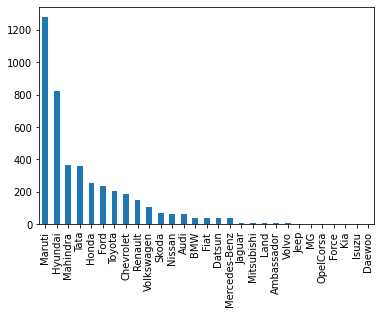

In [ ]:
dataset.iloc[:,0].value_counts().plot(kind='bar')

In [ ]:
print(lr.score(x_test,y_test))

0.7408151235359608
